In [ ]:
!gdown --id 1O_X3E3EJipS8FPjD2ZqkRvOTVADLsRVp

Downloading...
From: https://drive.google.com/uc?id=1O_X3E3EJipS8FPjD2ZqkRvOTVADLsRVp
To: /content/Mahasiswa.xls
100% 32.3k/32.3k [00:00<00:00, 11.6MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Mahasiswa.xls')

df.head()

,Id,Penghasilan,Pengeluaran
0,1,18.76,9.68
1,2,8.35,4.52
2,3,17.03,10.11
3,4,8.23,9.25
4,5,16.89,6.99


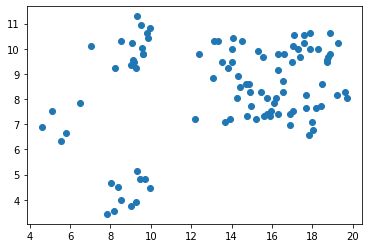

In [ ]:
plt.scatter(df["Penghasilan"], df["Pengeluaran"])

In [ ]:
def plot_linguistik(titik, warna, label, min, max):
  y = [0,1,1,0]
  plt.plot([min, titik[0]], [0,0], warna)

  for i in range(len(titik) - 1):
    plt.plot([titik[i], titik[i+1]], [y[i], y[i+1]], warna)

  plt.plot([titik[3], max], [0,0], warna, label=label)

def plot_membership(membership, min, max):
  warna = ['r', 'g', 'b', 'c']

  i = 0
  for ling in membership:
    plot_linguistik(membership[ling], warna[i], ling, min, max)
    i+=1
  plt.legend(loc=3)
  plt.show()

In [ ]:
pengeluaran = {
    'low' : [0,0,2,4],
    'avg' : [3,4,8,9],
    'high': [8,10,15,15]
}

penghasilan = {
    'low' : [0,0,2,4],
    'avg' : [3,5,7,9],
    'high': [8,10,10,12],
    'verh': [11,15,22,22]
}

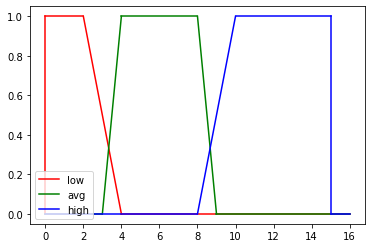

In [ ]:
plot_membership(pengeluaran, min = 0, max=16)

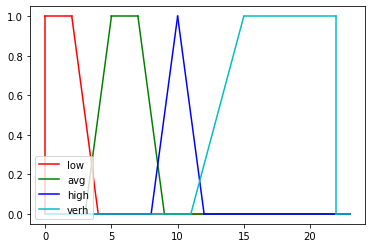

In [ ]:
plot_membership(penghasilan, min=0, max=23)

In [ ]:
def fuzzy_linguistik(x, titik):
  if x >= titik[1] and x <= titik[2]:
    return 1
  elif x >= titik[0] and x < titik[1]:
    return (x - titik[0]) / (titik[1] - titik[0])
  elif x >= titik[2] and x < titik[3]:
    return (titik[3] - x) / (titik[3] - titik[2])
  else:
    return 0

def fuzzy_membership(x, membership):
  hasil = {}

  for ling in membership:
    hasil[ling] = fuzzy_linguistik(x, membership[ling])

  return hasil

def fuzzyfikasi(x, list_membership):
  hasil = []
  for i in range(len(list_membership)):
    hasil.append(fuzzy_membership(x[i], list_membership[i]))

  return hasil

In [ ]:
fuzzy_membership(10, pengeluaran)

{'avg': 0, 'high': 1, 'low': 0}

In [ ]:
fuzzy_membership(12, penghasilan)

{'avg': 0, 'high': 0, 'low': 0, 'verh': 0.25}

In [ ]:
x_fuzzy = [fuzzy_membership(8.3, penghasilan), fuzzy_membership(10, pengeluaran)]
x_fuzzy

[{'avg': 0.34999999999999964,
  'high': 0.15000000000000036,
  'low': 0,
  'verh': 0},
 {'avg': 0, 'high': 1, 'low': 0}]

In [ ]:
rule = {
    ('low', 'low')   : 'consider',
    ('low', 'avg')   : 'accept',
    ('low', 'high')  : 'accept',
    ('avg', 'low')   : 'reject',
    ('avg', 'avg')   : 'consider',
    ('avg', 'high')  : 'accept',
    ('high', 'low')  : 'reject',
    ('high', 'avg')  : 'reject',
    ('high', 'high') : 'consider',
    ('verh', 'low')  : 'reject',
    ('verh', 'avg')  : 'reject',
    ('verh', 'high') : 'reject'
}

In [ ]:
def inferensi(x_fuzzy, rule):
  hasil = {}
  for l1, v1 in x_fuzzy[0].items():
    for l2, v2 in x_fuzzy[1].items():

      r, min_value = (l1, l2), min(v1, v2)

      current_value = hasil.get(rule[r], 0)

      hasil[rule[r]] = max(min_value, current_value)
  return hasil

In [ ]:
x_infer = inferensi(x_fuzzy, rule)
x_infer

{'accept': 0.34999999999999964, 'consider': 0.15000000000000036, 'reject': 0}

In [ ]:
def defuzz_sugeno(x_infer, membership):
  num, den = 0, 0

  for ling in membership:
    num += x_infer[ling] * membership[ling]
    den += x_infer[ling]

  return num / den

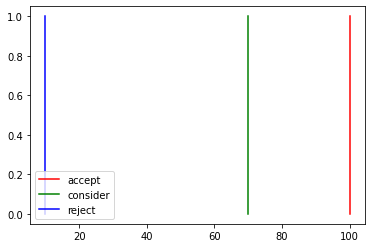

In [ ]:
accept_sugeno = {'accept':100, 'consider':70, 'reject':10}

#plot membership sugeno
colors = 'rgb'
for key, val in accept_sugeno.items():
  plt.plot([val, val], [0,1], colors[0], label = key)
  colors = colors[1:]
plt.legend(loc=3)

In [ ]:
defuzz_sugeno(x_infer, accept_sugeno)

90.99999999999997

## **PROGRAM MAIN**

In [ ]:
skor = []
for x in df.drop('Id', axis=1).values:
  x_fuzzy = fuzzyfikasi(x, [penghasilan, pengeluaran])
  x_infer = inferensi(x_fuzzy, rule)
  x_defuz = defuzz_sugeno(x_infer, accept_sugeno)
  skor.append(x_defuz)

df['Skor'] = skor

In [ ]:
df_get_beasiswa = df.sort_values(by='Skor', ascending=False)[:20]
df_not_beasiswa = df.drop(df_get_beasiswa.index)

df_get_beasiswa

,Id,Penghasilan,Pengeluaran,Skor
32,33,7.03,10.11,100.0
3,4,8.23,9.25,93.1
78,79,8.52,10.32,84.4
12,13,5.55,6.35,70.0
24,25,6.48,7.85,70.0
74,75,5.09,7.53,70.0
37,38,9.94,10.82,70.0
68,69,9.86,10.43,70.0
40,41,4.62,6.88,70.0
65,66,9.63,9.78,70.0


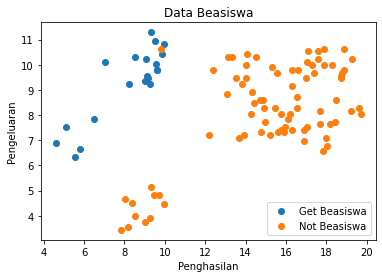

In [ ]:
plt.scatter(df_get_beasiswa.Penghasilan,
            df_get_beasiswa.Pengeluaran,
            label = 'Get Beasiswa')

plt.scatter(df_not_beasiswa.Penghasilan,
            df_not_beasiswa.Pengeluaran,
            label='Not Beasiswa')
plt.xlabel('Penghasilan')
plt.ylabel('Pengeluaran')
plt.title('Data Beasiswa')
plt.legend(loc='lower right')
plt.show()